In [1]:
%load_ext autoreload
%autoreload 2

---------------------------

## Config

In [2]:
import sys

In [3]:
project_dir = '/home/pmonteagudo/workspace/silencing_project'
if project_dir not in sys.path: 
    sys.path.append(project_dir)
from config_analysis import *

---------------------------

- Import dataframe containing **annotation of all samples**

In [9]:
sample_annotation_file = os.path.join(project_data_dir, 'seq_data', 'sample_annotation.csv')
sample_annotation_file

'/gcm-lfs1/pablo/data/rna_silencing/seq_data/sample_annotation.csv'

In [10]:
#select_cols = ['sample_id', 'pipeline_type', 'seq_category', 'seq_type',  'mutant_id', 'mutant', 'replicate', 'batch', 'trimmed', 'halic_local_dir']
select_cols = ['sample_id', 'pipeline_type', 'seq_category', 'seq_type',  'mutant_id', 'mutant', 'replicate', 'batch', 'trimmed']

In [11]:
all_samples_df = pd.read_csv(sample_annotation_file, sep="\t", usecols=select_cols)[select_cols]
all_samples_df.head()

,sample_id,pipeline_type,seq_category,seq_type,mutant_id,mutant,replicate,batch,trimmed
0,1022_S2-ChIP-INPUT_1,ChIP,INPUT,S2-ChIP-INPUT,1022,mot2d,1,revision,False
1,1022_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,1022,mot2d,1,revision,False
2,1168_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,1168,caf1d*ccr4d*,1,revision,False
3,301_S2-ChIP-INPUT_1,ChIP,INPUT,S2-ChIP-INPUT,301,swi6d,1,manuscript,False
4,301_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,301,swi6d,1,revision,False


In [12]:
all_samples_df.shape

(154, 9)

In [17]:
#all_samples_df.groupby('seq_type').size()

- **Ignore S2-RIP/S5-RIP samples** for now

In [8]:
# #all_samples_df = all_samples_df[all_samples_df['seq_type'] != 'S2-RIP']
# all_samples_df = all_samples_df[all_samples_df['seq_type'] != 'S5-RIP']
# all_samples_df.shape

- **Ignore S2-ChIP/S5-ChIP samples** for now

In [9]:
# #all_samples_df = all_samples_df[all_samples_df['seq_type'] != 'S2-ChIP']
# all_samples_df = all_samples_df[all_samples_df['seq_type'] != 'S5-ChIP']
# all_samples_df.shape

---------------------------

# **Import STAR summary** Files: .Log.final.out

---------------------------

- Filter for specific `seq_assay` **samples**

In [10]:
seq_assay='H3K9me2'

In [16]:
#df = all_samples_df[all_samples_df['seq_type'] == seq_assay]simulated-data/
df = all_samples_df[all_samples_df['seq_type'] != 'simulated-data']
#df = all_samples_df
df.shape

(153, 10)

- Add `star_log_file` column for each mutant

In [17]:
df['star_log_file'] = df.apply(
    lambda row: os.path.join(project_data_dir, 'seq_data', row.seq_category, 'bam', row.sample_id, row.sample_id + '.Log.final.out'), axis=1)

/home/pmonteagudo/anaconda3/envs/heterochromatin/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df.head()

,sample_id,pipeline_type,seq_category,seq_type,mutant_id,mutant,replicate,batch,trimmed,star_log_file
0,1022_S2-ChIP-INPUT_1,ChIP,INPUT,S2-ChIP-INPUT,1022,mot2d,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...
1,1022_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,1022,mot2d,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...
2,1168_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,1168,caf1d*ccr4d*,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...
3,301_S2-ChIP-INPUT_1,ChIP,INPUT,S2-ChIP-INPUT,301,swi6d,1,manuscript,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...
4,301_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,301,swi6d,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...


In [19]:
df.shape

(153, 10)

- Import **.Log.final.out** files:

In [20]:
summary_logs_df = pd.concat(
    [pd.read_csv(
        ff, sep ='\t', names=['var', os.path.basename(ff).split('.')[0]], index_col = 'var'
    ) for ff in df['star_log_file']], sort=False, axis = 1) # assume files are identical! sort=False

In [21]:
summary_logs_df.head()

,1022_S2-ChIP-INPUT_1,1022_S2-ChIP-OIN_1,1168_S2-ChIP-OIN_1,301_S2-ChIP-INPUT_1,301_S2-ChIP-OIN_1,302_S2-ChIP-INPUT_1,302_S2-ChIP-OIN_1,324_S2-ChIP-INPUT_1,324_S2-ChIP-OIN_1,491_S2-ChIP-INPUT_1,...,530_H3K9me2_1,638_H3K9me2_1,510_total-RNA_1,510_total-RNA_2,638_total-RNA_1,638_total-RNA_2,80_total-RNA_1,80_total-RNA_2,WT_total-RNA_1,WT_total-RNA_2
var,,,,,,,,,,,,,,,,,,,,,
Started job on |,Jun 25 15:50:35,Jun 25 16:18:16,Jun 25 16:11:06,Jun 25 18:01:11,Jun 25 16:13:33,Jun 25 17:58:19,Jun 25 16:15:28,Jun 25 15:04:50,Jun 25 18:29:14,Jun 25 15:13:43,...,Jun 25 16:16:21,Jun 25 17:52:05,Jun 25 22:59:10,Jun 25 22:52:44,Jun 25 23:05:08,Jun 25 21:31:34,Jun 25 22:56:11,Jun 25 21:10:14,Jun 25 23:15:54,Jun 25 21:46:43
Started mapping on |,Jun 25 15:50:36,Jun 25 16:18:16,Jun 25 16:11:06,Jun 25 18:01:11,Jun 25 16:13:33,Jun 25 17:58:19,Jun 25 16:15:28,Jun 25 15:04:50,Jun 25 18:29:15,Jun 25 15:13:44,...,Jun 25 16:16:21,Jun 25 17:52:05,Jun 25 22:59:10,Jun 25 22:52:44,Jun 25 23:05:09,Jun 25 21:31:35,Jun 25 22:56:11,Jun 25 21:10:14,Jun 25 23:15:54,Jun 25 21:46:43
Finished on |,Jun 25 15:51:33,Jun 25 16:19:07,Jun 25 16:11:55,Jun 25 18:01:38,Jun 25 16:14:24,Jun 25 17:58:58,Jun 25 16:16:20,Jun 25 15:06:09,Jun 25 18:29:28,Jun 25 15:14:48,...,Jun 25 16:17:25,Jun 25 17:52:54,Jun 25 23:01:02,Jun 25 22:54:32,Jun 25 23:06:59,Jun 25 21:34:16,Jun 25 22:58:06,Jun 25 21:14:32,Jun 25 23:17:25,Jun 25 21:49:19
"Mapping speed, Million of reads per hour |",714.74,587.77,683.74,506.93,626.12,530.87,613.61,859.23,135.64,716.60,...,470.90,516.58,437.01,480.74,431.26,473.54,434.30,484.28,421.44,456.38
Number of input reads |,11316763,8326726,9306428,3802009,8869984,5751085,8863239,18855274,489822,12739492,...,8371611,7031273,13595863,14422065,13177284,21177938,13873441,34707061,10653086,19776309


In [22]:
summary_logs_df.shape

(36, 153)

- **Parse `idx` values** of Data Frame and **transpose**

In [23]:
summary_logs_df['idx'] =  summary_logs_df.index.str.replace("\||:|-|,|", '')
summary_logs_df['idx'] = [idx.strip(' ').replace(' ', '_') for idx in summary_logs_df['idx']]
summary_logs_df['idx'] = [idx.replace('%', 'frac') for idx in summary_logs_df['idx']]
# set new index
summary_logs_df = summary_logs_df.set_index('idx')

summary_logs_df = summary_logs_df.transpose()
# remove unwanted cols
summary_logs_df = summary_logs_df.drop(
    columns = ['Started_job_on', 'Started_mapping_on', 'Finished_on', # timing
               'UNIQUE_READS', 'UNMAPPED_READS',  'MULTIMAPPING_READS', 'CHIMERIC_READS', # repeated?
               'Number_of_chimeric_reads', 'frac_of_chimeric_reads'
              ]
)

# reset index to column and rename it to 'sample_id'
summary_logs_df = summary_logs_df.reset_index(drop=False).rename(columns = {'index':'sample_id'})

In [24]:
summary_logs_df.head()

idx,sample_id,Mapping_speed_Million_of_reads_per_hour,Number_of_input_reads,Average_input_read_length,Uniquely_mapped_reads_number,Uniquely_mapped_reads_frac,Average_mapped_length,Number_of_splices_Total,Number_of_splices_Annotated_(sjdb),Number_of_splices_GT/AG,...,Number_of_reads_mapped_to_multiple_loci,frac_of_reads_mapped_to_multiple_loci,Number_of_reads_mapped_to_too_many_loci,frac_of_reads_mapped_to_too_many_loci,Number_of_reads_unmapped_too_many_mismatches,frac_of_reads_unmapped_too_many_mismatches,Number_of_reads_unmapped_too_short,frac_of_reads_unmapped_too_short,Number_of_reads_unmapped_other,frac_of_reads_unmapped_other
0,1022_S2-ChIP-INPUT_1,714.74,11316763,50,8180107,72.28%,50.00,0,0,0,...,800063,7.07%,9069,0.08%,0,0.00%,1695680,14.98%,631844,5.58%
1,1022_S2-ChIP-OIN_1,587.77,8326726,50,6031078,72.43%,50.00,0,0,0,...,438703,5.27%,5899,0.07%,0,0.00%,1362332,16.36%,488714,5.87%
2,1168_S2-ChIP-OIN_1,683.74,9306428,50,6811738,73.19%,50.00,0,0,0,...,567436,6.10%,7039,0.08%,0,0.00%,1438322,15.46%,481893,5.18%
3,301_S2-ChIP-INPUT_1,506.93,3802009,50,2678260,70.44%,50.00,0,0,0,...,176431,4.64%,2883,0.08%,0,0.00%,696398,18.32%,248037,6.52%
4,301_S2-ChIP-OIN_1,626.12,8869984,50,6195787,69.85%,50.00,0,0,0,...,422415,4.76%,7204,0.08%,0,0.00%,1683006,18.97%,561572,6.33%


In [25]:
summary_logs_df.shape

(153, 28)

- Fix **column type's** and **remove** `%` from columns containing `frac`

In [26]:
frac_cols_type = {col:'float64' for col in summary_logs_df if 'frac' in col}
#frac_cols_type

In [27]:
frac_cols = list(frac_cols_type.keys())
#frac_cols

In [28]:
summary_logs_df = summary_logs_df.replace(to_replace = '\%', value ='', regex=True).astype(frac_cols_type)

In [29]:
# transform % to [0,1]
summary_logs_df[frac_cols] = summary_logs_df[frac_cols] / 100

In [30]:
summary_logs_df.head()

idx,sample_id,Mapping_speed_Million_of_reads_per_hour,Number_of_input_reads,Average_input_read_length,Uniquely_mapped_reads_number,Uniquely_mapped_reads_frac,Average_mapped_length,Number_of_splices_Total,Number_of_splices_Annotated_(sjdb),Number_of_splices_GT/AG,...,Number_of_reads_mapped_to_multiple_loci,frac_of_reads_mapped_to_multiple_loci,Number_of_reads_mapped_to_too_many_loci,frac_of_reads_mapped_to_too_many_loci,Number_of_reads_unmapped_too_many_mismatches,frac_of_reads_unmapped_too_many_mismatches,Number_of_reads_unmapped_too_short,frac_of_reads_unmapped_too_short,Number_of_reads_unmapped_other,frac_of_reads_unmapped_other
0,1022_S2-ChIP-INPUT_1,714.74,11316763,50,8180107,0.7228,50.00,0,0,0,...,800063,0.0707,9069,0.0008,0,0.0,1695680,0.1498,631844,0.0558
1,1022_S2-ChIP-OIN_1,587.77,8326726,50,6031078,0.7243,50.00,0,0,0,...,438703,0.0527,5899,0.0007,0,0.0,1362332,0.1636,488714,0.0587
2,1168_S2-ChIP-OIN_1,683.74,9306428,50,6811738,0.7319,50.00,0,0,0,...,567436,0.0610,7039,0.0008,0,0.0,1438322,0.1546,481893,0.0518
3,301_S2-ChIP-INPUT_1,506.93,3802009,50,2678260,0.7044,50.00,0,0,0,...,176431,0.0464,2883,0.0008,0,0.0,696398,0.1832,248037,0.0652
4,301_S2-ChIP-OIN_1,626.12,8869984,50,6195787,0.6985,50.00,0,0,0,...,422415,0.0476,7204,0.0008,0,0.0,1683006,0.1897,561572,0.0633


In [31]:
summary_logs_df.shape

(153, 28)

- **STAR log cols**: ignore `sample_id` column

In [32]:
star_log_cols = summary_logs_df.columns[1:].tolist()
#star_log_cols

- Merge with sample **annotation** DataFrame

In [33]:
summary_logs_df = pd.merge(all_samples_df, summary_logs_df, on='sample_id')

In [34]:
summary_logs_df.head()

,sample_id,pipeline_type,seq_category,seq_type,mutant_id,mutant,replicate,batch,trimmed,star_log_file,...,Number_of_reads_mapped_to_multiple_loci,frac_of_reads_mapped_to_multiple_loci,Number_of_reads_mapped_to_too_many_loci,frac_of_reads_mapped_to_too_many_loci,Number_of_reads_unmapped_too_many_mismatches,frac_of_reads_unmapped_too_many_mismatches,Number_of_reads_unmapped_too_short,frac_of_reads_unmapped_too_short,Number_of_reads_unmapped_other,frac_of_reads_unmapped_other
0,1022_S2-ChIP-INPUT_1,ChIP,INPUT,S2-ChIP-INPUT,1022,mot2d,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...,...,800063,0.0707,9069,0.0008,0,0.0,1695680,0.1498,631844,0.0558
1,1022_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,1022,mot2d,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...,...,438703,0.0527,5899,0.0007,0,0.0,1362332,0.1636,488714,0.0587
2,1168_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,1168,caf1d*ccr4d*,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...,...,567436,0.0610,7039,0.0008,0,0.0,1438322,0.1546,481893,0.0518
3,301_S2-ChIP-INPUT_1,ChIP,INPUT,S2-ChIP-INPUT,301,swi6d,1,manuscript,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...,...,176431,0.0464,2883,0.0008,0,0.0,696398,0.1832,248037,0.0652
4,301_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,301,swi6d,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...,...,422415,0.0476,7204,0.0008,0,0.0,1683006,0.1897,561572,0.0633


In [35]:
summary_logs_df.shape

(153, 37)

- **Store** dataframe containing annotation of all samples:

In [36]:
summary_logs_file = os.path.join(project_data_dir, 'seq_data', 'summary_alignment_logs.csv')
summary_logs_file

'/gcm-lfs1/pablo/data/rna_silencing/seq_data/summary_alignment_logs.csv'

In [37]:
summary_logs_df.to_csv(summary_logs_file, sep="\t", index=False)

---------------------------

# Visualization

---------------------------

In [38]:
import seaborn as sns

In [39]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

- Prepare Data Frame into **tidy format** for visualization using `seaborn`

In [45]:
id_vars = select_cols.copy()
id_vars.append('star_log_file')

In [46]:
#id_vars

In [47]:
summary_logs_tidy_df = pd.melt(summary_logs_df, id_vars = id_vars, var_name = 'star_log_var')
summary_logs_tidy_df = summary_logs_tidy_df.astype({'value':'float64'})

In [48]:
summary_logs_tidy_df.head()

,sample_id,pipeline_type,seq_category,seq_type,mutant_id,mutant,replicate,batch,trimmed,star_log_file,star_log_var,value
0,1022_S2-ChIP-INPUT_1,ChIP,INPUT,S2-ChIP-INPUT,1022,mot2d,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...,Mapping_speed_Million_of_reads_per_hour,714.74
1,1022_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,1022,mot2d,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...,Mapping_speed_Million_of_reads_per_hour,587.77
2,1168_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,1168,caf1d*ccr4d*,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...,Mapping_speed_Million_of_reads_per_hour,683.74
3,301_S2-ChIP-INPUT_1,ChIP,INPUT,S2-ChIP-INPUT,301,swi6d,1,manuscript,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...,Mapping_speed_Million_of_reads_per_hour,506.93
4,301_S2-ChIP-OIN_1,ChIP,INPUT,S2-ChIP-OIN,301,swi6d,1,revision,False,/gcm-lfs1/pablo/data/rna_silencing/seq_data/IN...,Mapping_speed_Million_of_reads_per_hour,626.12


In [49]:
summary_logs_tidy_df.shape

(4131, 12)

- Variables that can be used for plotting

In [50]:
plot_vars = summary_logs_tidy_df['star_log_var'].unique()
#plot_vars

## **A.** Number of:
- **Input reads**
- **Uniquely mapped reads**

In [51]:
plot_abs_vars = ['Number_of_input_reads', 'Uniquely_mapped_reads_number']

In [52]:
summary_logs_plot = summary_logs_tidy_df[summary_logs_tidy_df["star_log_var"].isin(plot_abs_vars)]
#summary_logs_plot

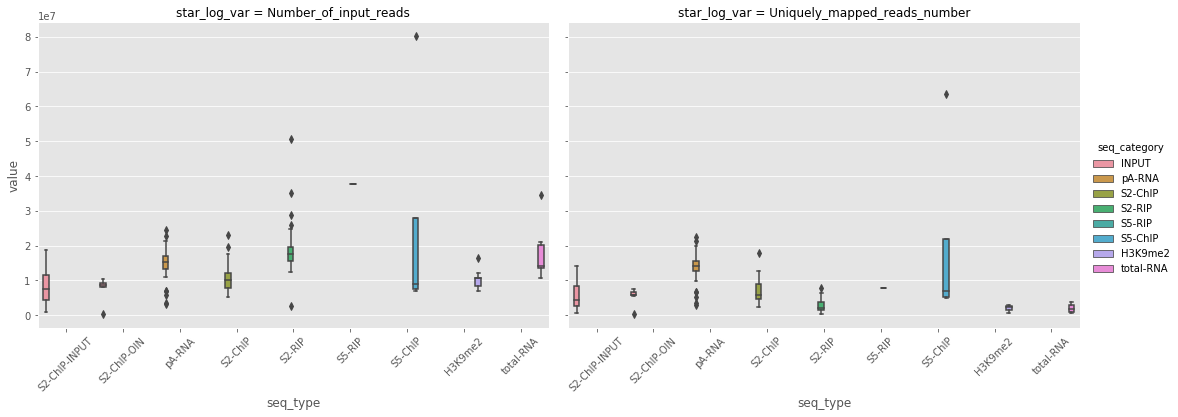

In [54]:
box_plot = sns.catplot(
    data=summary_logs_plot, 
    x="seq_type", y="value",
    hue="seq_category", 
    col="star_log_var",
    kind="box",
    aspect=1.5
    #aspect=1
)
    
box_plot.set_xticklabels(rotation=45)

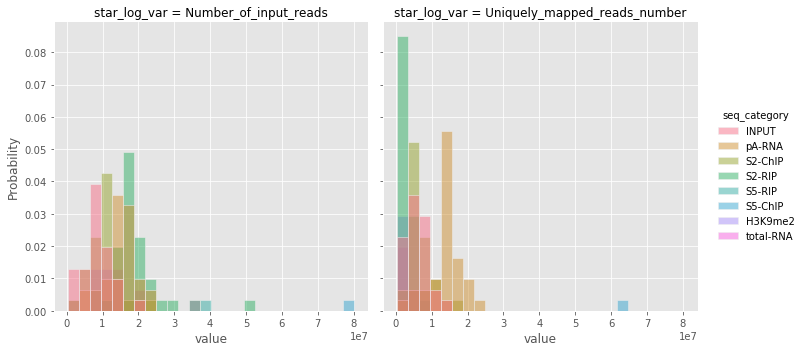

In [55]:
dist_plot = sns.displot(
    data=summary_logs_plot, 
    x="value", 
    hue="seq_category", 
    col="star_log_var",
    col_wrap=2,
    #col_wrap=4,
    stat="probability"
)

## **B.** Fraction of:
- **Uniquely Mapped**
- **Multi-mapped**
- **Mapped to too many loci**
- Unmapped due to:
    - **too many mismatches**
    - **too short**
    - **other**

In [56]:
plot_abs_vars = [
    'Uniquely_mapped_reads_frac', 'frac_of_reads_mapped_to_multiple_loci', 'frac_of_reads_mapped_to_too_many_loci', 
    'frac_of_reads_unmapped_too_many_mismatches', 'frac_of_reads_unmapped_too_short', 'frac_of_reads_unmapped_other'
]

In [57]:
summary_logs_plot = summary_logs_tidy_df[summary_logs_tidy_df["star_log_var"].isin(plot_abs_vars)]
#summary_logs_plot

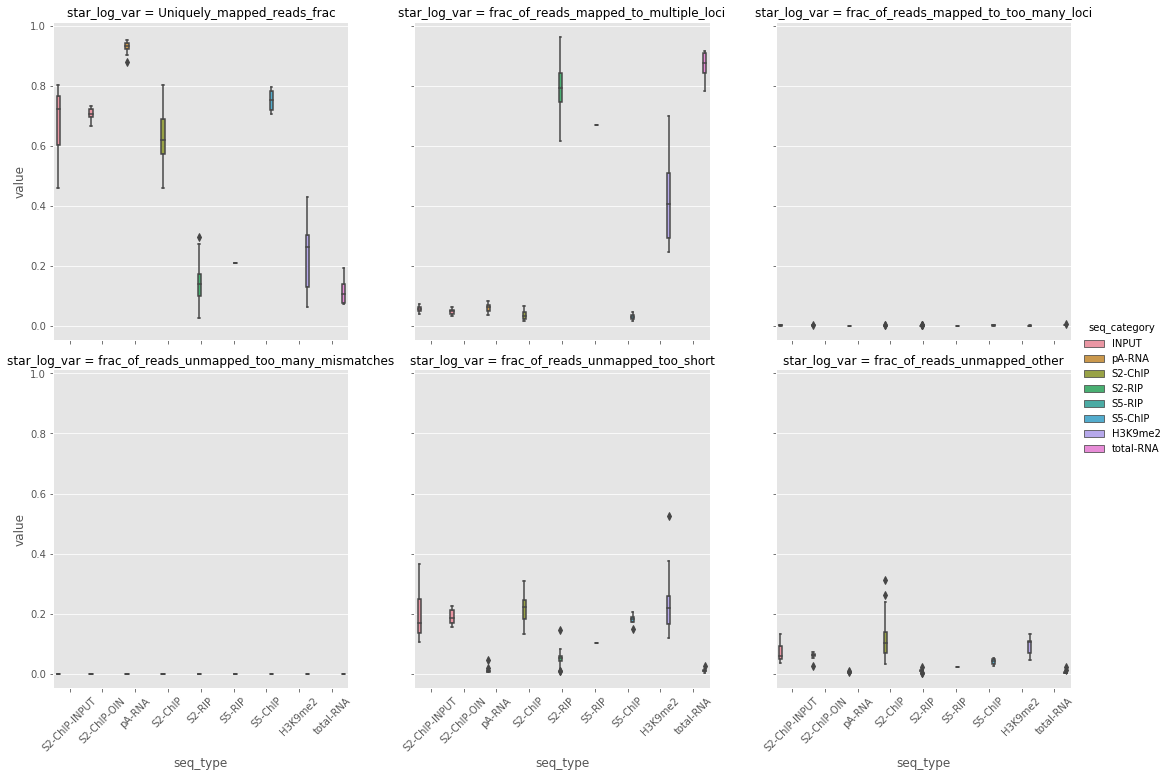

In [59]:
box_plot = sns.catplot(
    data=summary_logs_plot, 
    x="seq_type", y="value",
    hue="seq_category",
    col="star_log_var",
    kind="box",
    col_wrap = 3,
    #aspect=1.5
    aspect=1
)
    
box_plot.set_xticklabels(rotation=45)


(0, 1)

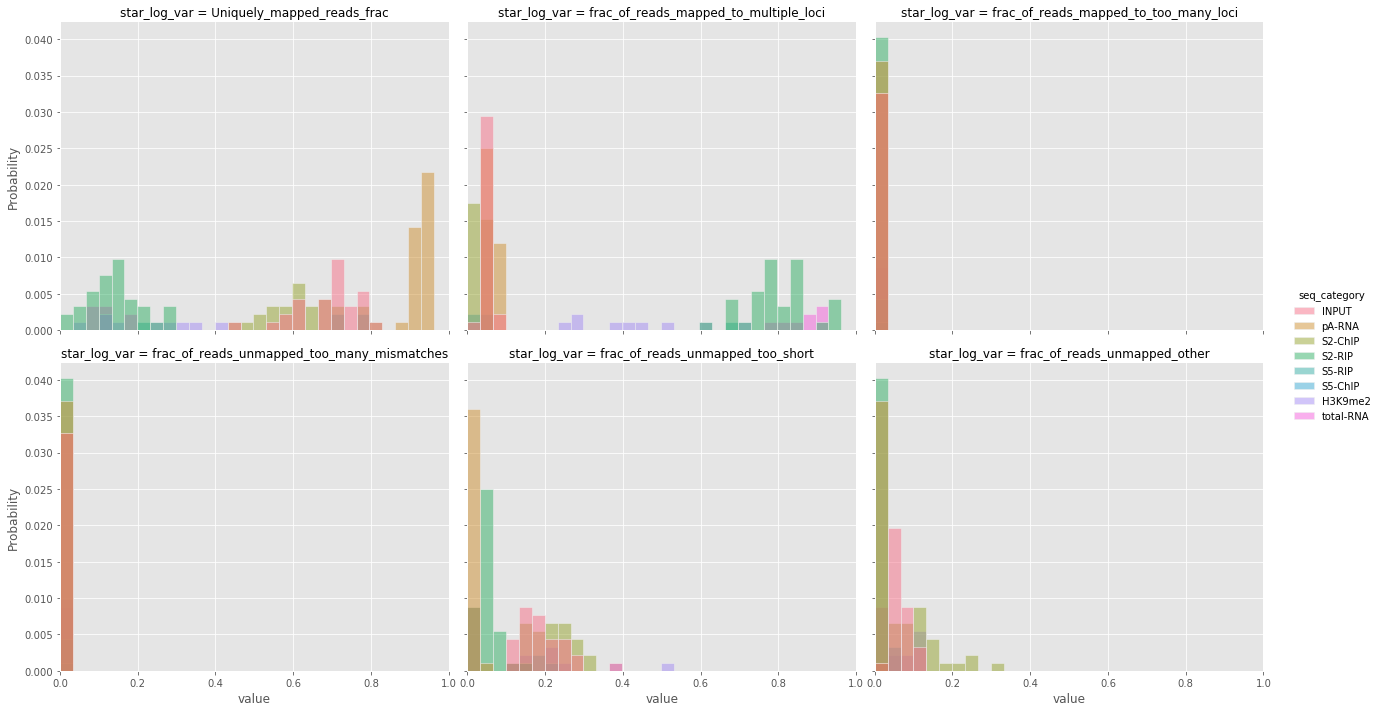

In [60]:
dist_plot = sns.displot(
    data=summary_logs_plot, 
    x="value", 
    hue="seq_category", 
    col="star_log_var",
    col_wrap=3,
    #col_wrap=4,
    stat="probability",
    aspect=1.2
)

plt.xlim(0, 1)

## **C.** Number of Splicing events

In [61]:
plot_abs_vars = [
    'Number_of_splices_Total', 'Number_of_splices_Annotated_(sjdb)', 'Number_of_splices_GT/AG',
    'Number_of_splices_GC/AG', 'Number_of_splices_AT/AC', 'Number_of_splices_Noncanonical'
]

In [62]:
summary_logs_plot = summary_logs_tidy_df[summary_logs_tidy_df["star_log_var"].isin(plot_abs_vars)]
#summary_logs_plot

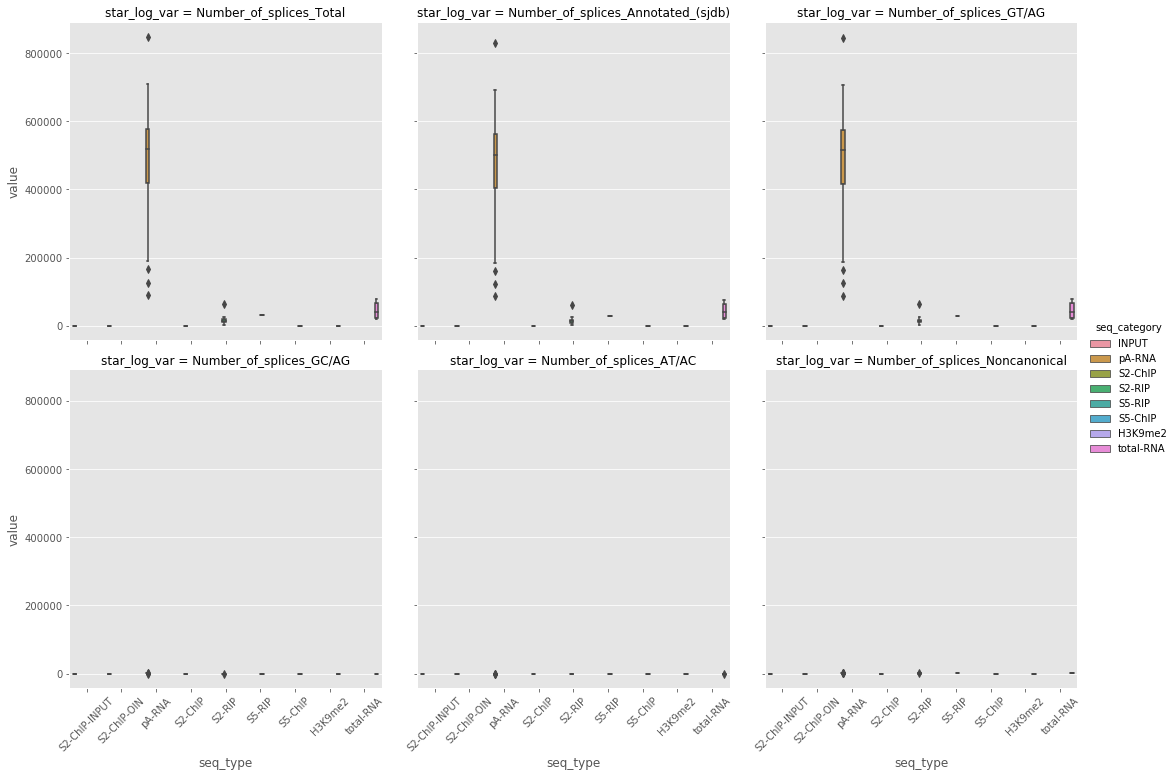

In [64]:
box_plot = sns.catplot(
    data=summary_logs_plot,
    x="seq_type", y="value",
    hue="seq_category", 
    col="star_log_var",
     kind="box",
    col_wrap = 3,
    #aspect=1.5
    aspect=1
)
    
box_plot.set_xticklabels(rotation=45)

## **D.** Average Input read length and Mapped length

In [65]:
plot_abs_vars = ['Average_input_read_length', 'Average_mapped_length']

In [66]:
# # check
# ['Mismatch_rate_per_base_frac', 'Deletion_rate_per_base',
# 'Deletion_average_length', 'Insertion_rate_per_base',
# 'Insertion_average_length',
# # already ploted frac which is more interesenting
# 'Number_of_reads_mapped_to_multiple_loci',
# 'Number_of_reads_mapped_to_too_many_loci',
# 'Number_of_reads_unmapped_too_many_mismatches',
# 'Number_of_reads_unmapped_too_short',
# 'Number_of_reads_unmapped_other']

In [67]:
summary_logs_plot = summary_logs_tidy_df[summary_logs_tidy_df["star_log_var"].isin(plot_abs_vars)]
#summary_logs_plot

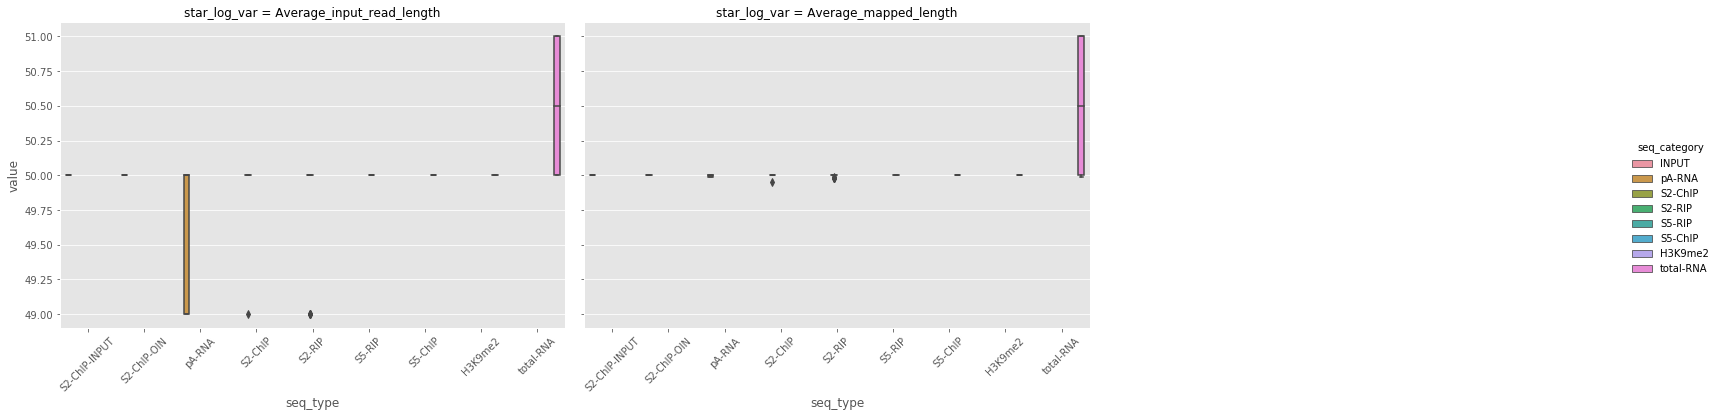

In [68]:
box_plot = sns.catplot(
    data=summary_logs_plot, 
    x="seq_type", y="value",
    hue="seq_category", 
    col="star_log_var",
    kind="box",
    col_wrap = 3,
    aspect=1.5
)
    
box_plot.set_xticklabels(rotation=45)

## **E.** Rate of Mismatch, Deletion and Insertion per base

In [69]:
plot_abs_vars = ['Mismatch_rate_per_base_frac', 'Deletion_rate_per_base', 'Insertion_rate_per_base',]

In [70]:
# # check
# ['Deletion_average_length', 'Insertion_average_length', 
# # already ploted frac which is more interesenting
# 'Number_of_reads_mapped_to_multiple_loci',
# 'Number_of_reads_mapped_to_too_many_loci',
# 'Number_of_reads_unmapped_too_many_mismatches',
# 'Number_of_reads_unmapped_too_short',
# 'Number_of_reads_unmapped_other']

In [71]:
summary_logs_plot = summary_logs_tidy_df[summary_logs_tidy_df["star_log_var"].isin(plot_abs_vars)]
#summary_logs_plot

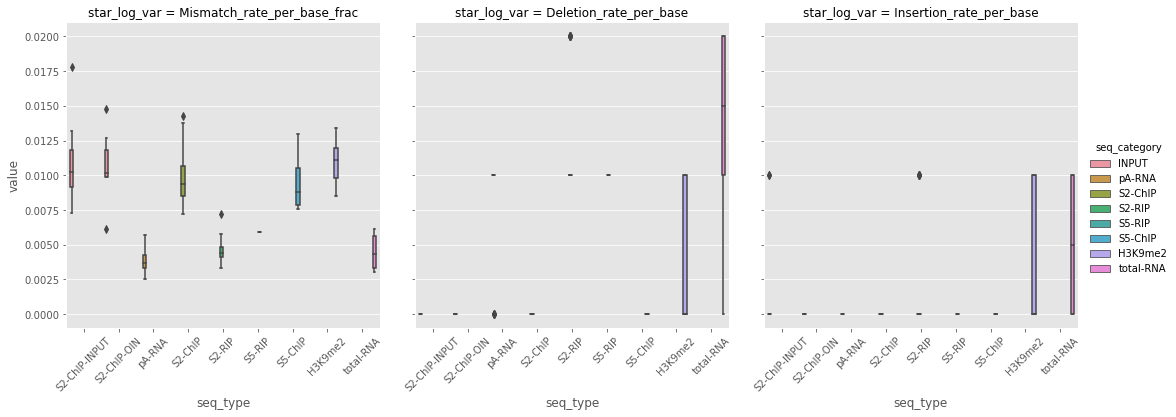

In [72]:
box_plot = sns.catplot(
    data=summary_logs_plot,
    x="seq_type", y="value",
    hue="seq_category",
    col="star_log_var",
    kind="box",
    col_wrap = 3,
    #aspect=1.5
    aspect=1
)
    
box_plot.set_xticklabels(rotation=45)

## **D.** Average Deletion and Insertion length

In [73]:
plot_abs_vars = ['Deletion_average_length', 'Insertion_average_length']

In [74]:
summary_logs_plot = summary_logs_tidy_df[summary_logs_tidy_df["star_log_var"].isin(plot_abs_vars)]
#summary_logs_plot

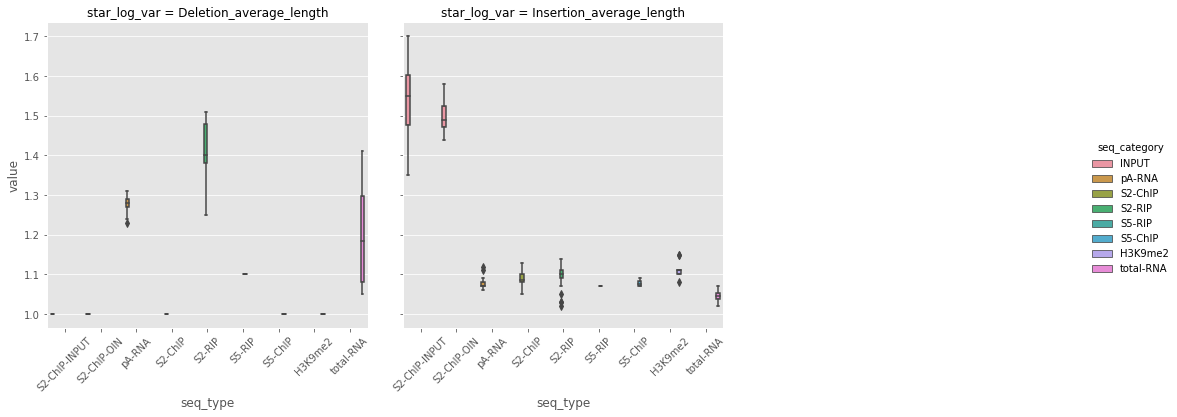

In [75]:
box_plot = sns.catplot(
    data=summary_logs_plot,
    x="seq_type", y="value",
    hue="seq_category", 
    col="star_log_var",
    kind="box",
    col_wrap = 3,
    #aspect=1.5
    aspect=1
)
    
box_plot.set_xticklabels(rotation=45)

In [ ]:
## already ploted frac which is more interesenting
['Number_of_reads_mapped_to_multiple_loci',
'Number_of_reads_mapped_to_too_many_loci',
'Number_of_reads_unmapped_too_many_mismatches',
'Number_of_reads_unmapped_too_short',
'Number_of_reads_unmapped_other']